In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from  youtube_transcript_api import YouTubeTranscriptApi

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Provide the link of the video that needs to summarized and read out

In [4]:
youtube_video="https://www.youtube.com/watch?v=SSE4M0gcmvE"

Obtaining the video ID of the youtube video provided

In [5]:
video_id = youtube_video.split("=")[1]
print(video_id)

SSE4M0gcmvE


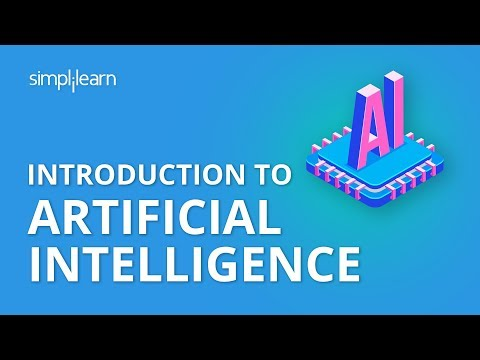

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

Generating the transcript of the YouTube video provided


In [7]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript= YouTubeTranscriptApi.get_transcript(video_id)

In [8]:
transcript[0:5]

[{'text': '[Music]', 'start': 2.59, 'duration': 9.81},
 {'text': 'introduction of artificial intelligence',
  'start': 10.16,
  'duration': 6.04},
 {'text': 'and machine learning', 'start': 12.4, 'duration': 3.8},
 {'text': 'by the end of this lesson you will be',
  'start': 16.64,
  'duration': 5.04},
 {'text': 'able to define artificial intelligence',
  'start': 18.48,
  'duration': 5.039}]

Compiling all the transcripts to create a paragraph text that has all detail from the video 

In [9]:
result=""
for i in transcript:
  result += ' '+i['text']
#Entire transcript of the Video
print(len(result))
print(result)

15865
 [Music] introduction of artificial intelligence and machine learning by the end of this lesson you will be able to define artificial intelligence describe the relationship between artificial intelligence and data science define machine learning describe the relationship between machine learning artificial intelligence and data science describe different machine learning approaches identify the applications of machine learning let's understand how the field of artificial intelligence emerged let's first understand the reason behind the emergence of a.i data economy is one of the factors behind the emergence of ai it refers to how much data has grown over the past few years and how much more it can grow in the coming years when you look at this graph you can clearly understand how the volume of data has grown you can see that since 2009 the data volume has increased by 44 times with the help of social websites the explosion of data has given rise to a new economy and there is a co

In [11]:
#From transformer package
summarizer= pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

Summarizing the text that was created by compiling the transcripts.


> The aforementioned procedure is carried out by breaking up the entire text into chunks, summarising each one, and adding it to summarized_text at the conclusion of the loop.





In [ ]:
num_iters = int(len(result)/1000)
summarized_text= []
for i in range(0,num_iters+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  out=summarizer(result[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)

print("Summarized Text:")
print(summarized_text)

print("Number of line in summarized text: ")
print(len(summarized_text))

In [ ]:
str(summarized_text)

In [ ]:
def listToString(s):
  str1=""
  for ele in s:
    str1+=ele
  return str1

sum_text = listToString(summarized_text)
print(sum_text)

In [ ]:
print('Number of words in summarized text')
print(len(str(summarized_text)))

In [ ]:
print(f"We summarized the video from {len(result)} words to {len(str(summarized_text))} words")

Coverting summarized text into audio

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS
from IPython.display import Audio,display
my_text=sum_text
language='en'

tts=gTTS(text=my_text, lang=language, slow=False)

tts.save("output.mp3")
display(Audio("output.mp3",autoplay=True))